# Multi Layer Perceptron

In [1]:
import tensorflow as tf

from d2l.tensorflow import data, losses, metrics, plot, config, initializers

config.setup()

Tensorflow running on CPU


## Load data

In [2]:
batch_size = 256

train_iter, test_iter = data.load_tfds_dataset('fashion_mnist', batch_size)

## ReLU activation function

In [3]:
def relu(X):
    return tf.maximum(X, 0)

## MLP

In [4]:
def net(X, inference=False):
    X = tf.reshape(X, (-1, num_inputs))
    X = relu(tf.matmul(X, W1) + b1)
    return tf.matmul(X, W2) + b2

## Parameters

In [5]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1, b1 = initializers.initialize_parameters(num_inputs, num_hiddens, scale=0.1)
W2, b2 = initializers.initialize_parameters(num_hiddens, num_outputs, scale=0.1)

Ws = [W1, W2]
bs = [b1, b2]

num_epochs, learning_rate = 10, 0.5
num_inputs, num_outputs, num_hiddens = 784, 10, 256

loss_function = losses.softmax_cross_entropy
eval_metric = metrics.accuracy
eval_function = metrics.evaluate_accuracy

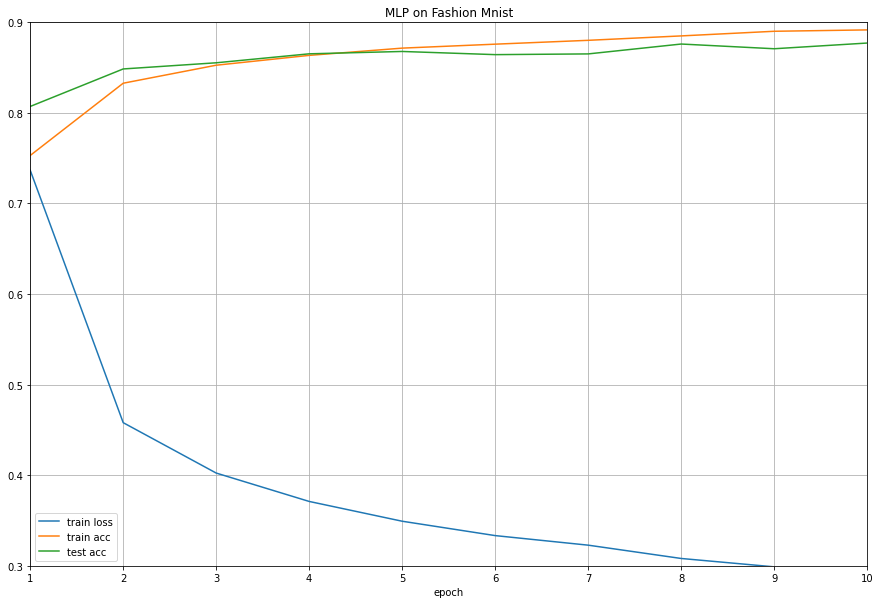

In [6]:
 animator = plot.Animator(
    xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
    legend=['train loss', 'train acc', 'test acc'], title='MLP on Fashion Mnist'
)

for epoch in range(num_epochs):
    
    metric = metrics.Accumulator(3)

    for X, y in train_iter:
        with tf.GradientTape() as t:
            y_hat = net(X)
            loss = loss_function(y, y_hat)
        dW, db = t.gradient(loss, [Ws, bs])
        for i in range(len(Ws)):
            Ws[i].assign_sub((learning_rate * dW[i]) / batch_size)
            bs[i].assign_sub((learning_rate * db[i]) / batch_size)
        metric.add(tf.reduce_sum(loss), eval_metric(y, y_hat), y.shape[0])

    train_metrics = metric[0] / metric[2], metric[1] / metric[2]
    test_acc = eval_function(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))